<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>StellarClassification</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Professor:** Jefferson de Oliveira Silva

**Alunos:**

<table align="left" style=font-size:15px>
<thead>
  <tr>
    <th style="text-align:left;">Nome</th>
    <th style="text-align:left;">RA</th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align:left;">Carlos Eduardo de Oliveira</td>
    <td>RA00297792</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Gustavo Schlieper Tessitore</td>
    <td>RA00297844</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Isaac Higuchi</td>
    <td>RA00306191</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">João Pedro Taves Araujo</td>
    <td>RA00297753</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Lucas Lopes Amorim</td>
    <td>RA00303799</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Thiago de Jesus Carvalho</td>
    <td>RA00297792</td>
    <td></td>
  </tr>
</tbody>
</table>

<h3><b>Estrutura:</b></h3>
<ol>
   <li><a href="#section-1">Contextualização</a></li>
   <li><a href="#section-2">Objetivo do Trabalho</a></li>
   <li>
      <a href="#section-3">Método</a>
      <ol style="list-style: none; padding-left: 10px">
         <li>3.1. <a href="#section-3-1">Entendimento dos Dados</a></li>
         <li>3.2. <a href="#section-3-2">Preparação dos Dados</a></li>
         <ol style="list-style: none; padding-left: 20px">
            <li>3.2.1 <a href="#section-3-2-1">Gerando novos atributos</a></li>
            <li>3.2.2 <a href="#section-3-2-2">Tratando variáveis categórias</a></li>
         </ol>
         <li>3.3. <a href="#section-3-3">Modelagem</a></li>
         <ol style="list-style: none; padding-left: 20px">
            <li>3.3.1 <a href="#section-3-3-1">Modelo #1: Árvore de Decisão</a></li>
            <li>3.3.2 <a href="#section-3-3-2">Modelo #2: Floresta Aleatória de Classificação</a></li>
            <li>3.3.3 <a href="#section-3-3-3">Modelo #3: Naive Bayes</a></li>
            <li>3.3.4 <a href="#section-3-3-4">Modelo #4: SVC</a></li>
            <li>3.3.5 <a href="#section-3-3-5">Modelo #5: KNN</a></li>
         </ol>
      </ol>
   </li>
   <li><a href="#section-4">Limitações</a></li>
   <li><a href="#section-5">Conclusões</a></li>
</ol>
<p><a href="#section-n">Referências</a></p>

# 1. Contextualização <a class="anchor" id="section-1"></a>
[Voltar ao topo](#section-0)

# 2. Objetivo do Trabalho <a class="anchor" id="section-2"></a>
[Voltar ao topo](#section-0)

# 3. Método <a class="anchor" id="section-3"></a>
[Voltar ao topo](#section-0)

## 3.1 Entendimento dos Dados <a class="anchor" id="section-3-1"></a>
[Voltar ao topo](#section-0)

## 3.2 Preparação dos Dados <a class="anchor" id="section-3-2"></a>
[Voltar ao topo](#section-0)

In [1]:
# Para manipulação dos dados
import pandas as pd

# Para criação do nosso pipeline
from sklearn.compose import ColumnTransformer

# Para tratamentos de dados
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Para separação em treino e teste
from sklearn.model_selection import train_test_split

# Para aplicar resamplings
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Para ignorar mensagens de warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift', 'MJD']

In [4]:
preprocessing = ColumnTransformer(transformers=[
    ('scaling', StandardScaler(), cols),
], remainder='drop')

In [5]:
target_encoder = OrdinalEncoder()

In [6]:
X, y = df.drop('class', axis=1), df['class']

In [7]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X , y, test_size=0.2)

In [8]:
X_train = preprocessing.fit_transform(X_train_full)
y_train_encoded = target_encoder.fit_transform(y_train.values.reshape(-1, 1))

In [9]:
X_test = preprocessing.transform(X_test_full)
y_test_encoded = target_encoder.fit_transform(y_test.values.reshape(-1, 1))

**Aplicando Oversampling:**

In [10]:
def apply_oversampling(X_train_, y_train_, **kwargs):
    ros = RandomOverSampler(**kwargs)
    X_train_oversam_, y_train_oversam_ = ros.fit_resample(X_train_, y_train_)
    return X_train_oversam_, y_train_oversam_

In [11]:
X_train_oversam, y_train_oversam = apply_oversampling(X_train, y_train, random_state=42)

**Aplicando Undersampling:**

In [12]:
def apply_undersampling(X_train_, y_train_, **kwargs):
    rus = RandomUnderSampler(**kwargs)
    X_train_undersam_, y_train_undersam_ = rus.fit_resample(X_train, y_train)
    return X_train_undersam_, y_train_undersam_

In [13]:
X_train_undersam, y_train_undersam = apply_undersampling(X_train, y_train, random_state=42)

**Aplicando PCA:**

**EM CONTRUÇÃO**

## 3.3 Modelagem <a class="anchor" id="section-3-3"></a>
[Voltar ao topo](#section-0)

### 3.3.1 Modelo #1: Árvore de Decisão <a class="anchor" id="section-3-3-1"></a>
[Voltar ao topo](#section-0)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix


In [15]:
cl_tree = DecisionTreeClassifier()

In [16]:
cl_tree = cl_tree.fit(X_train, y_train)
previsao = cl_tree.predict(X_test)

In [17]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11958
         QSO       0.91      0.91      0.91      3744
        STAR       0.99      0.99      0.99      4298

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



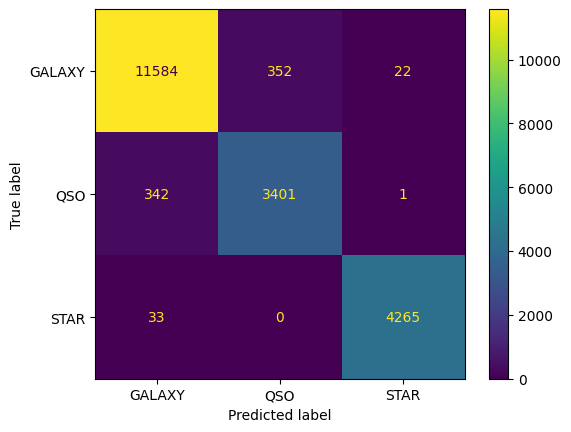

In [18]:
plot_confusion_matrix(cl_tree, X_test, y_test)

### 3.3.2 Modelo #2: Floresta Aleatória de Classificação <a class="anchor" id="section-3-3-2"></a>
[Voltar ao topo](#section-0)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf = rf_clf.fit(X_train, y_train)

previsao_rf = rf_clf.predict(X_test)

In [21]:
print(classification_report(y_test, previsao_rf))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11958
         QSO       0.96      0.93      0.94      3744
        STAR       0.99      1.00      1.00      4298

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



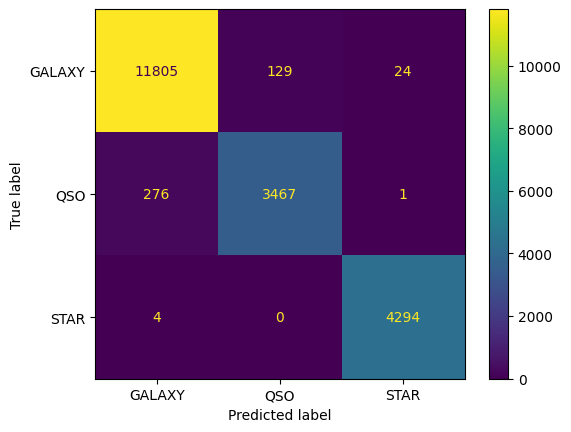

In [22]:
plot_confusion_matrix(rf_clf, X_test, y_test)

### 3.3.3 Modelo #3: Naive Bayes <a class="anchor" id="section-3-3-3"></a>
[Voltar ao topo](#section-0)

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
predict = gnb.predict(X_test)
predict

array(['QSO', 'GALAXY', 'QSO', ..., 'QSO', 'GALAXY', 'QSO'], dtype='<U6')

In [26]:
accuracy_score(y_test, predict)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      GALAXY       0.96      0.89      0.92     11958
         QSO       0.73      0.88      0.80      3744
        STAR       0.98      0.99      0.98      4298

    accuracy                           0.91     20000
   macro avg       0.89      0.92      0.90     20000
weighted avg       0.92      0.91      0.91     20000



### 3.3.4 Modelo #4: SVC <a class="anchor" id="section-3-3-4"></a>
[Voltar ao topo](#section-0)

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [28]:
model = SVC(class_weight='balanced', kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [29]:
y_pred = model.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.95      0.97     11958
         QSO       0.94      0.93      0.94      3744
        STAR       0.92      1.00      0.96      4298

    accuracy                           0.96     20000
   macro avg       0.95      0.96      0.95     20000
weighted avg       0.96      0.96      0.96     20000



### 3.3.5 Modelo #5: KNN <a class="anchor" id="section-3-3-5"></a>
[Voltar ao topo](#section-0)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.93      0.96      0.95     11958
         QSO       0.96      0.90      0.93      3744
        STAR       0.91      0.88      0.90      4298

    accuracy                           0.93     20000
   macro avg       0.94      0.91      0.92     20000
weighted avg       0.93      0.93      0.93     20000

